# Seaborn


Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

In [ ]:
import pandas as pd
import math
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt

#%matplotlib inline   ### this is a specific line required for plotting in jupyter notebook

UsageError: unrecognized arguments: ### this is a specific line required for plotting in jupyter notebook


In [ ]:
import seaborn as sns

In [ ]:
sns.set(color_codes=True)

In [ ]:
data_file='Existing_Base.csv'

eb=pd.read_csv(data_file)

In [ ]:
eb.shape

(10155, 32)

In [ ]:
eb = eb.iloc[0:100,:] # for the sake of simplicity i have taken only first 100 observations, 
                #you can go ahead and can consider the whole dataset

In [ ]:
eb

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108,Zero,65-70,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1955,Meridian,RG42 1YH,RG42,0.00,134.95,19.49,233.86,0.00,114.41,0.00,13.99,4.99,0.00,0.00,2,Male,South East,77.66,22.23,61.21,157.17
96,109,Zero,31-35,Single/Never Married,Secretarial/Admin,Retired,Live in Parental Hom,"<15,000, >=12,500",No,No,1998,Scottish TV,PA1 2TT,PA1,35.00,39.49,53.97,99.93,14.48,22.45,11.47,47.46,0.00,1.99,0.00,2,Female,Scotland,48.57,13.90,32.63,112.12
97,110,Zero,55-60,Partner,Professional,Housewife,Own Home,">=35,000",Yes,No,1992,Meridian,M34 1TS,M34,0.00,0.00,0.00,0.00,16.97,0.00,0.00,0.00,0.00,0.00,0.00,2,Male,North West,3.39,0.00,2.83,10.92
98,111,1,26-30,Partner,Professional,Professional,Rent Privately,">=35,000",No,No,1999,Meridian,PO4 9JX,PO4,0.00,0.00,0.00,32.99,0.00,0.00,20.98,0.00,0.00,0.00,0.00,2,Male,South East,6.60,3.50,9.00,17.08


In [ ]:
eb.shape

(100, 32)

In [ ]:
eb.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

# Visualising Numeric Data

Let's take the variable "Portfolio Balance" and see its distribution for which we use distplot() function. This function by default will give histogram and fit a kernel density estimate (KDE).

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

The KDE plots the density of observations on one axis with height along the other axis.

In [ ]:
eb_port=eb["Portfolio Balance"]

In [ ]:
eb_port.describe()

count    100.000000
mean      92.037700
std       77.073476
min      -41.700000
25%       28.752500
50%       83.290000
75%      134.357500
max      313.410000
Name: Portfolio Balance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


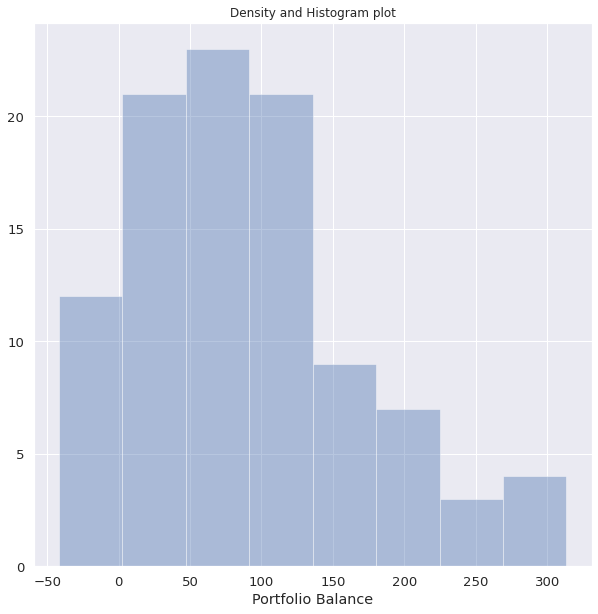

In [ ]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(10,10))
plt.title('Density and Histogram plot',fontsize=12)
a = sns.distplot(eb_port,kde = False)

In [ ]:
myimage = a.get_figure()
myimage.savefig('histogram.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


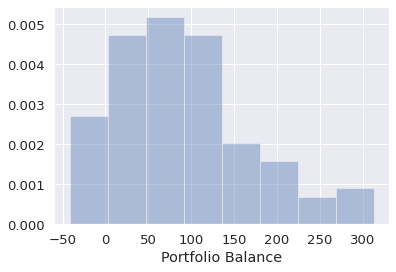

In [ ]:
sns.distplot(eb_port,kde = False,norm_hist=True)### kde = kernel density estimator

#rug plot will draw a small vertical tick at each observation.

In [ ]:
?sns.distplot

In [ ]:
sns.__version__

'0.10.0'

In [ ]:
?sns.distplot

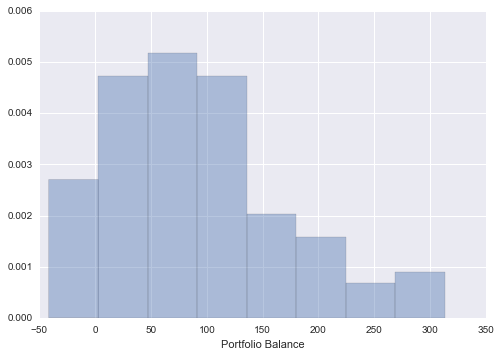

In [ ]:
sns.distplot(eb_port,kde=False,norm_hist=True) #density on y axis rather than count

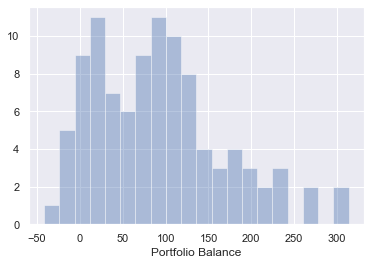

In [ ]:
sns.distplot(eb_port,bins=20, kde=False)#binning, number of bins can be chosen explictly

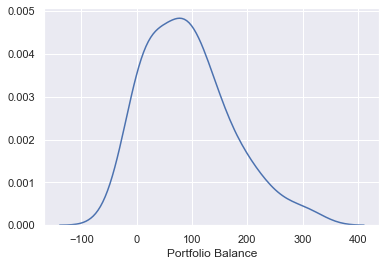

In [ ]:
sns.distplot(eb_port, hist=False)#density plot

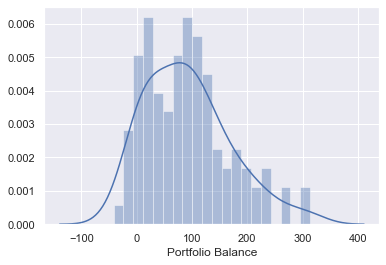

In [ ]:
sns.distplot(eb_port,bins=20) #both density and histogram plots

You can also use kdeplot() to plot density distributions of variables in a single frame

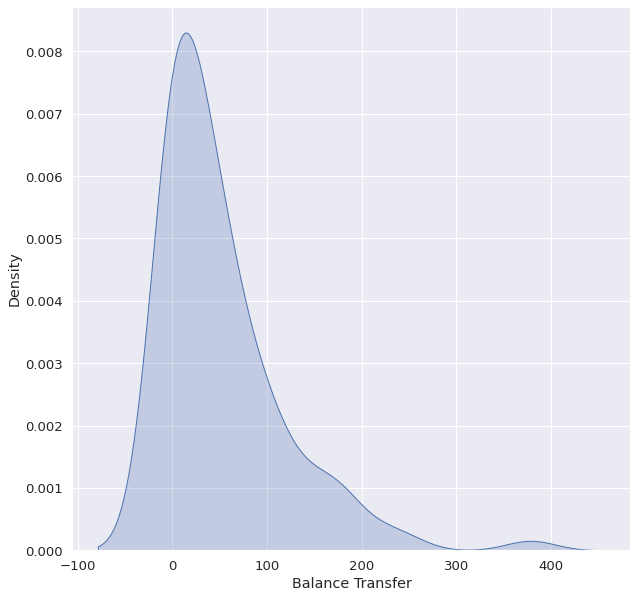

In [ ]:
plt.figure(figsize=(10,10))
#sns.kdeplot(eb["Portfolio Balance"], shade=True)
#sns.kdeplot(eb["Investment in Commudity"], shade=True)
sns.kdeplot(eb['Balance Transfer'],shade =True)

In [ ]:
eb_port.describe()

count    100.000000
mean      92.037700
std       77.073476
min      -41.700000
25%       28.752500
50%       83.290000
75%      134.357500
max      313.410000
Name: Portfolio Balance, dtype: float64

In [ ]:
eb['Balance Transfer'].describe()

count    100.00000
mean      51.74660
std       65.86052
min        0.00000
25%        0.00000
50%       29.48500
75%       74.98000
max      378.31000
Name: Balance Transfer, dtype: float64

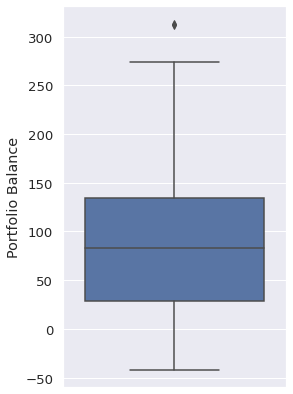

In [ ]:
plt.figure(figsize = (4,7))
sns.boxplot(y = eb_port)
#sns.boxplot(y = eb['Balance Transfer'])

# Plotting Bivariate Distributions


Seaborn is useful to visualize a bivariate distribution of two variables. Here we use the jointplot function which shows both the bivariate relationship between two variables along with the univariate distribution of each on separate axes.

Let's consider two variables here "Investment in Commudity" and "Portfolio Balance" and visualize there bivariate distribution.

### Scatterplots

In [ ]:
eb

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108,Zero,65-70,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,...,4.99,0.00,0.00,2,Male,South East,77.66,22.23,61.21,157.17
96,109,Zero,31-35,Single/Never Married,Secretarial/Admin,Retired,Live in Parental Hom,"<15,000, >=12,500",No,No,...,0.00,1.99,0.00,2,Female,Scotland,48.57,13.90,32.63,112.12
97,110,Zero,55-60,Partner,Professional,Housewife,Own Home,">=35,000",Yes,No,...,0.00,0.00,0.00,2,Male,North West,3.39,0.00,2.83,10.92
98,111,1,26-30,Partner,Professional,Professional,Rent Privately,">=35,000",No,No,...,0.00,0.00,0.00,2,Male,South East,6.60,3.50,9.00,17.08


AttributeError: ignored

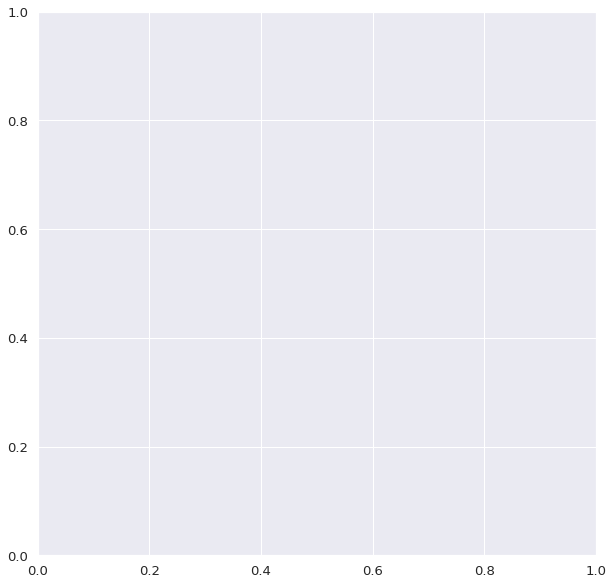

In [ ]:
### you can use seaborn to plot
### you can use matplot functailities to modify the plot

plt.figure(figsize = (10,10))
sns.scatterplot(x=eb["Investment in Commudity"], y=eb["Portfolio Balance"],hue = eb['Revenue Grid'],palette="tab10")
plt.xlabel('Commudity Investment')
plt.ylabel('Balance Portfolio')
plt.legend(loc = 'lower right')
plt.title('Investment vs portfolio')

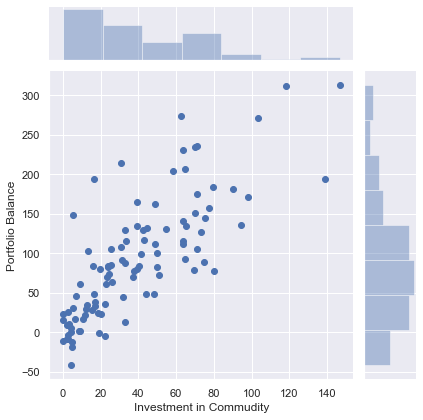

In [ ]:
sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", data=eb)
# scatterplot is default kind of plot shown by the jointplot() function

In [ ]:
?sns.jointplot

### Kernel density estimation

Bivariate distribution can also be visualized using the kernel density estimation.

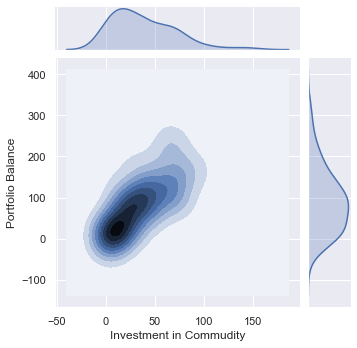

In [ ]:
sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", kind="kde",height=5,data=eb)

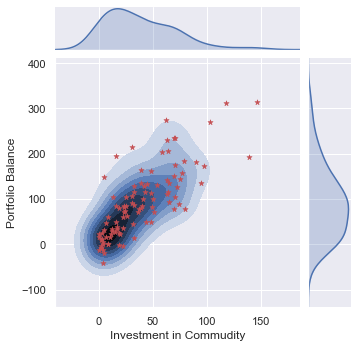

In [ ]:
s=sns.jointplot(x="Investment in Commudity", y="Portfolio Balance", kind="kde",height=5,data=eb)

s.plot_joint(plt.scatter, c="r", s=30, linewidth=0.5, marker="*")

s.ax_joint.collections[0].set_alpha(0)
# you can add more layers to it to tweak other aspects of visualization

In [ ]:
?s.ax_joint.collections

### Functions to draw linear regression models

Now to visualize a linear relationship between two variables we use the function lmplot().

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


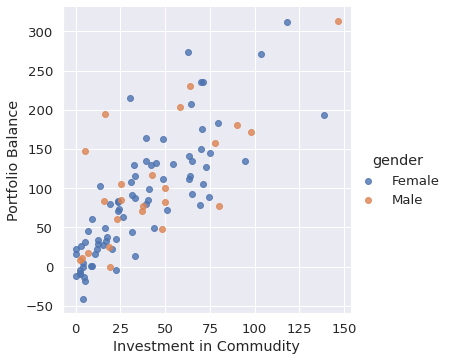

In [ ]:
sns.lmplot('Investment in Commudity','Portfolio Balance',data = eb, hue = 'gender',fit_reg=False)

#sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
#           data=eb,hue = 'children', palette="Set1",legend_out = True,
#           fit_reg=True)

# fit_reg=False will give only the scatterplot of both the variables

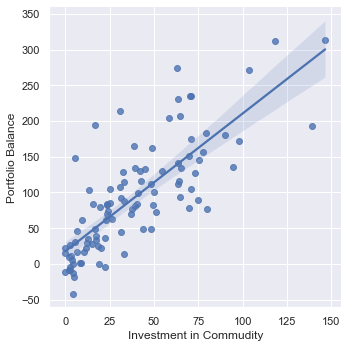

In [ ]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
           data=eb,palette="Set1",fit_reg =True)
# lmplot function by default gives a regression line (linear relationship) between the two variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


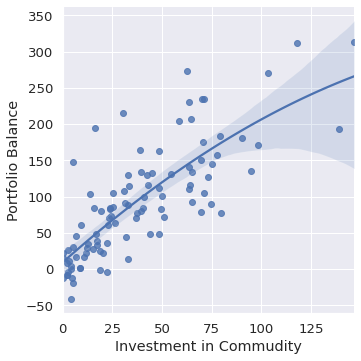

In [ ]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', 
           data=eb, 
           order=2)

#setting order here will give polynomial relationship between two variables

Text(0.5, 1, 'myplot')

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


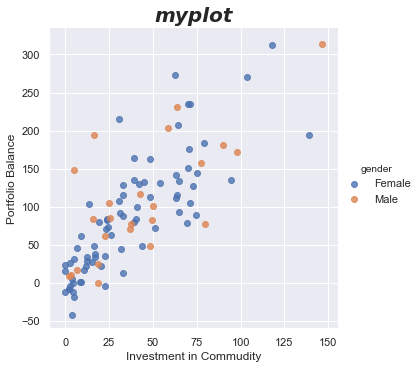

In [ ]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', hue="gender",data=eb,fit_reg=False)

plt.title("myplot", fontname='Ubuntu', fontsize=20,
            fontstyle='italic', fontweight='bold')

# shows how does the relationship between the two variables change as a function of a third variable,
# here the third variable is "gender"

#Note: You can add lable to this such as title

To add another variable, 
you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


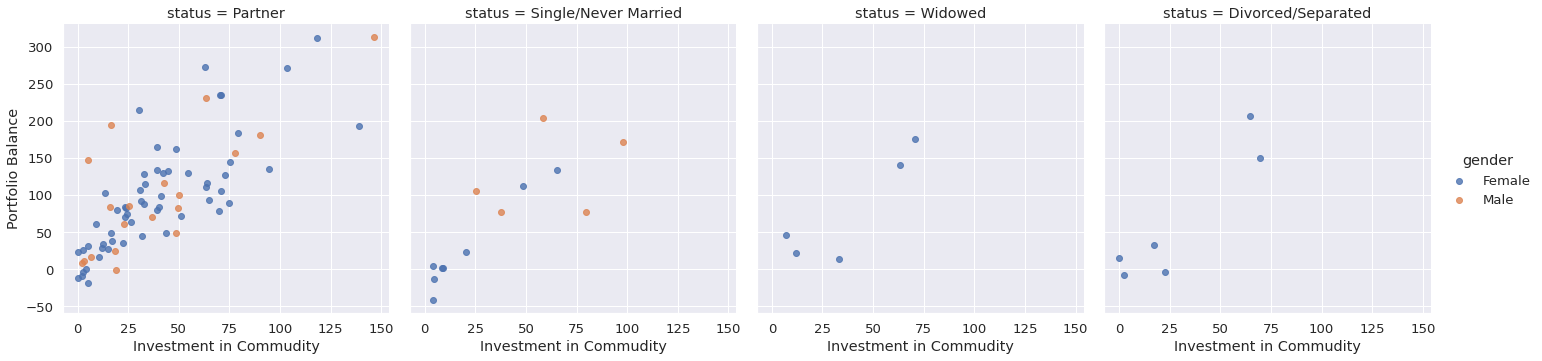

In [ ]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance',hue = 'gender', data = eb, col = 'status', fit_reg= False)
#sns.lmplot('Investment in Commudity', 'Portfolio Balance',hue = 'gender' ,col = 'status',data=eb,fit_reg=False,size=3)

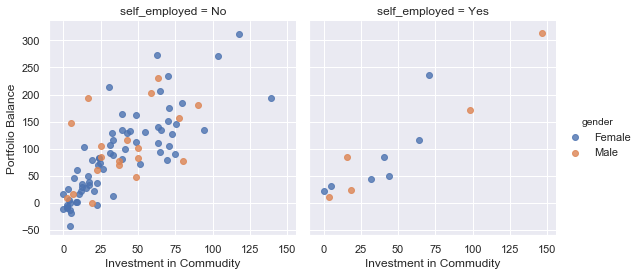

In [ ]:
sns.lmplot('Investment in Commudity', 'Portfolio Balance', hue="gender",col="self_employed",
            data=eb,fit_reg=False,size=4)

In [ ]:
?sns.lmplot

In [ ]:
eb.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

# Visualising categorical data

From above plots we have seen bivariate relationship between two continuous variabes, but what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work.

So we are going to look into different plots in order to visualize categorical variables.

### Categorical Scatterplots

We will use the function stripplot(), which generalizes a scatterplot to the case where one of the variables is categorical

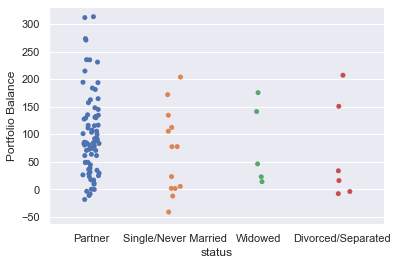

In [ ]:
sns.stripplot(x='status', y="Portfolio Balance", data=eb,jitter=True) ## numeric and categorocal data

Or you can use swarmplot(),which positions each scatterplot point on the categorical axis such that it avoids overlapping points

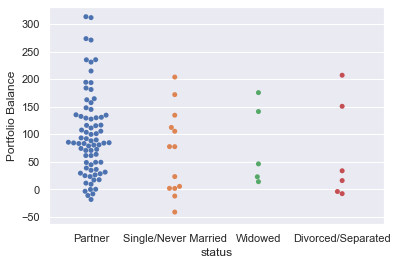

In [ ]:
sns.swarmplot(x='status', y="Portfolio Balance", data=eb)

You can also add another categorical variable using hue parameter

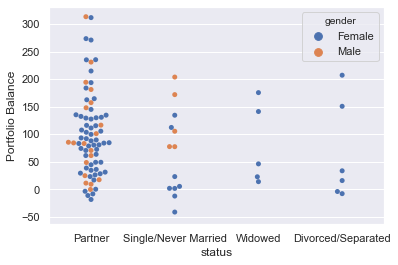

In [ ]:
sns.swarmplot(x='status', y="Portfolio Balance",hue="gender", data=eb)

### Distributions of observations within categories

**boxplot():** shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile and the points outside these are considered as outliers.

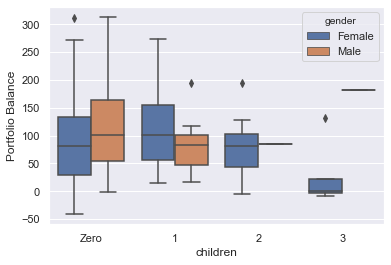

In [ ]:
sns.boxplot(x = 'children',y="Portfolio Balance", hue = 'gender',data=eb)

In [ ]:
eb['Portfolio Balance'].describe()

count    100.000000
mean      92.037700
std       77.073476
min      -41.700000
25%       28.752500
50%       83.290000
75%      134.357500
max      313.410000
Name: Portfolio Balance, dtype: float64

**violinplot():** combines a boxplot with the kernel density estimation, the quartile and whikser values from the boxplot are shown inside the violin

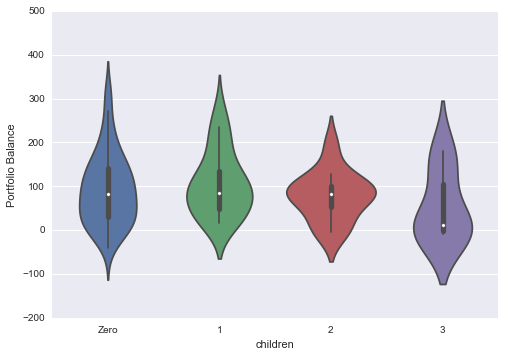

In [ ]:
sns.violinplot(y="Portfolio Balance", x="children", data=eb)

You can also add another categorical variable using hue parameter

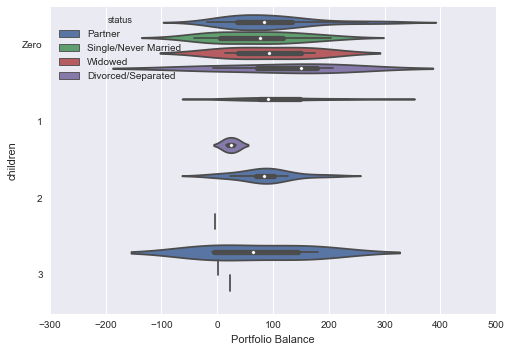

In [ ]:
sns.violinplot(x="Portfolio Balance", y="children",hue="status", data=eb)

# Statistical estimation within categories

**countplot():** counts number of observations in each category.

In [ ]:
eb.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

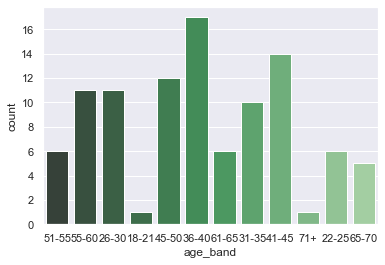

In [ ]:
sns.countplot(x="age_band", data=eb,palette="Greens_d") ## similar to barplot

# gives the count of each age_band

In [ ]:
eb.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

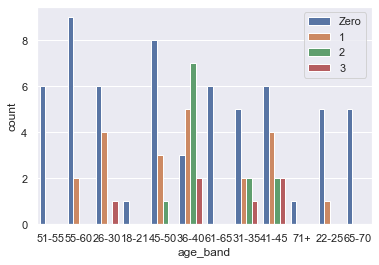

In [ ]:
sns.countplot(x="age_band", data=eb,hue="children")
plt.legend(loc = 'upper right')

# adding another categorical variable

**barplot():** operates on a full dataset and shows an arbitrary estimate, using the mean by default.

In [ ]:
eb.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


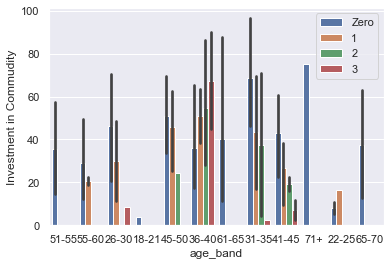

In [ ]:
sns.barplot(x="age_band", y="Investment in Commudity",hue="children",data=eb)
plt.legend(loc = 'upper right')

In [ ]:
?sns.barplot

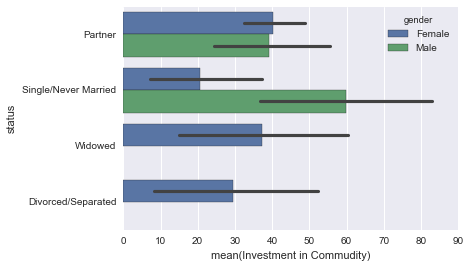

In [ ]:
sns.barplot(x="Investment in Commudity", y="status",hue="gender",data=eb)

# Heatmap


Load the example flights dataset and convert to long-form

In [ ]:
sns.set()
flights = sns.load_dataset("flights")
flights.dropna().head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
flights_long = flights.pivot("month", "year", "passengers")
flights_long

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


heatmap() function gives a good color mapping of the data.

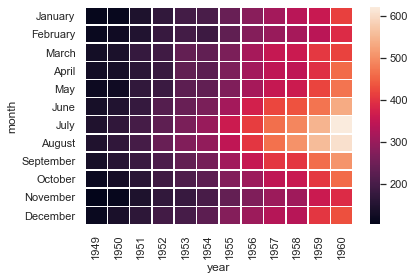

In [ ]:
sns.heatmap(flights_long, fmt="d", linewidths=.5)